In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
df = pd.read_csv('Data/bank-full.csv', delimiter=';')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

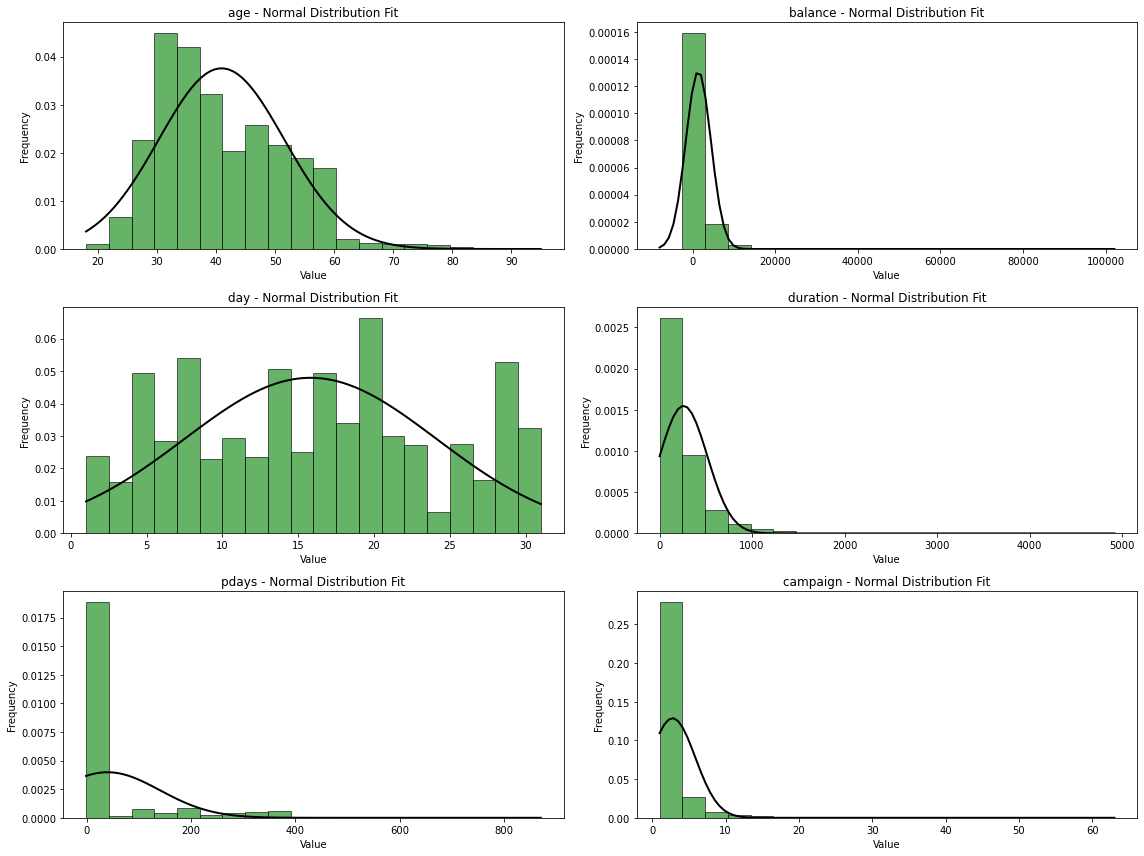

In [4]:
num_cols = ['age','balance','day','duration','pdays','campaign']
data = df[num_cols]

# Determine the number of rows and columns for subplots
num_variables = len(data.columns)
num_rows = (num_variables + 1) // 2  # Add 1 and then floor divide by 2 to ensure enough rows for all variables
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Loop through each column in your DataFrame
for i, column in enumerate(data.columns):
    # Fit a normal distribution to the data
    mu, std = norm.fit(data[column])
    
    # Create an array of values from min to max of the data
    xmin, xmax = min(data[column]), max(data[column])
    x = np.linspace(xmin, xmax, 100)
    
    # Calculate the probability density function (PDF) for the normal distribution
    pdf = norm.pdf(x, mu, std)
    
    # Plot the histogram of the data
    axes[i].hist(data[column], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
    
    # Plot the bell curve (PDF)
    axes[i].plot(x, pdf, 'k', linewidth=2)
    
    # Add labels and title
    axes[i].set_title(f'{column} - Normal Distribution Fit')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots
for j in range(num_variables, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

## Understanding Outliers in the dataset

### 1. Age

In [5]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [6]:
Q1 = df['age'].describe()[4]
Q3 = df['age'].describe()[6]
IQR = Q3-Q1

df[df['age'] > Q3 + 1.5 * IQR]['y'].value_counts()

no     269
yes    218
Name: y, dtype: int64

In [7]:
df[df['age'] > Q3 + 1.5 * IQR]['y'].value_counts()/len(df['y'])*100

no     0.594988
yes    0.482184
Name: y, dtype: float64

I don't believe any data needs to be removed here. There is a fairly even distribution of number of yes and no instances and these outliers only account for ~1% of our data.

### 2. Balance

In [8]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [9]:
Q1 = df['balance'].describe()[4]
Q3 = df['balance'].describe()[6]
IQR = Q3-Q1

df[df['balance'] > Q3 + 1.5 * IQR]['y'].value_counts()

no     3946
yes     766
Name: y, dtype: int64

In [10]:
df[(df['balance'] > Q3 + 1.5 * IQR) & (df['y'] == 'yes')]['balance'].describe()

count      766.000000
mean      7400.074413
std       6561.332559
min       3463.000000
25%       4198.000000
50%       5359.000000
75%       8148.000000
max      81204.000000
Name: balance, dtype: float64

In [12]:
df[df['balance'] > Q3 + 1.5 * IQR]['y'].value_counts()/len(df['y'])*100

no     8.727964
yes    1.694278
Name: y, dtype: float64

In [13]:
df[df['balance'] < Q1 - 1.5 * IQR]['y'].value_counts()

no     16
yes     1
Name: y, dtype: int64

In [14]:
df[df['balance'] < Q1 - 1.5 * IQR]['y'].value_counts()/len(df['y'])*100

no     0.035390
yes    0.002212
Name: y, dtype: float64

The lower outliers can possibly be removed as there are very few instances. But the outliers on the higher end might need more understanding. Let's see the correlation of balance with y.

In [15]:
y_map = {'yes':1, 'no':0}

df['y_mapped'] = df['y'].map(y_map)

df.corr()

,age,balance,day,duration,campaign,pdays,previous,y_mapped
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y_mapped,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


### Impact of Removal of Balance Outliers on Distribution of Data

In [16]:
df[df['balance'] > Q3 + 1.5 * IQR]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_mapped
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no,0
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no,0
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no,0
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no,0
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35,services,married,tertiary,no,4655,no,no,cellular,9,nov,111,2,-1,0,unknown,no,0
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no,0
45185,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,yes,1
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes,1


In [17]:
df_balance_outliers_rem = df[(df['balance'] > Q1 - 1.5 * IQR) & (df['balance'] < Q3 + 1.5 * IQR)]

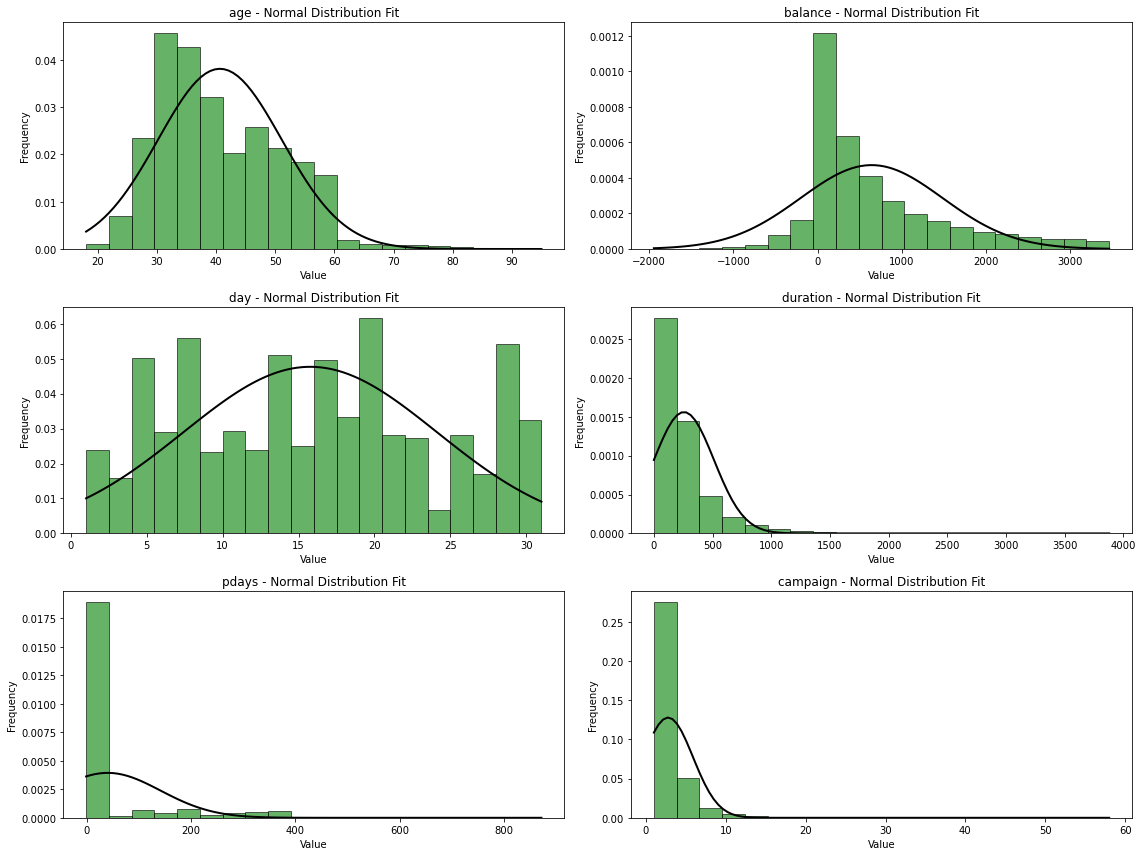

In [18]:
num_cols = ['age','balance','day','duration','pdays','campaign']
df_balance_outliers_rem = df_balance_outliers_rem[num_cols]

# Determine the number of rows and columns for subplots
num_variables = len(df_balance_outliers_rem.columns)
num_rows = (num_variables + 1) // 2  # Add 1 and then floor divide by 2 to ensure enough rows for all variables
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Loop through each column in your DataFrame
for i, column in enumerate(df_balance_outliers_rem.columns):
    # Fit a normal distribution to the data
    mu, std = norm.fit(df_balance_outliers_rem[column])
    
    # Create an array of values from min to max of the data
    xmin, xmax = min(df_balance_outliers_rem[column]), max(df_balance_outliers_rem[column])
    x = np.linspace(xmin, xmax, 100)
    
    # Calculate the probability density function (PDF) for the normal distribution
    pdf = norm.pdf(x, mu, std)
    
    # Plot the histogram of the data
    axes[i].hist(df_balance_outliers_rem[column], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
    
    # Plot the bell curve (PDF)
    axes[i].plot(x, pdf, 'k', linewidth=2)
    
    # Add labels and title
    axes[i].set_title(f'{column} - Normal Distribution Fit')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots
for j in range(num_variables, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

The removal of outliers in balance doesn't effect the distributions of our other fields as much so it would be safe to remove them without having it effect the performance of our model too much.

During the modelling phase, I could possibly test out what the model performance could be like had I not removed these outliers to see what the difference it.

### 3. Duration

In [19]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [20]:
Q1 = df['duration'].describe()[4]
Q3 = df['duration'].describe()[6]
IQR = Q3-Q1

df[df['duration'] > Q3 + 1.5 * IQR]['y'].value_counts()

yes    1651
no     1584
Name: y, dtype: int64

In [21]:
df[df['duration'] > Q3 + 1.5 * IQR]['y'].value_counts()/len(df['y'])*100

yes    3.651766
no     3.503572
Name: y, dtype: float64

In [22]:
df[df['duration'] > Q3 + 1.5 * IQR]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_mapped
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no,0
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no,0
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no,0
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no,0
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45124,27,blue-collar,single,primary,no,232,yes,no,cellular,26,oct,701,2,-1,0,unknown,yes,1
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no,0
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1


In [23]:
df_duration_outliers_rem = df_balance_outliers_rem[df_balance_outliers_rem['duration'] < Q3 + 1.5 * IQR]

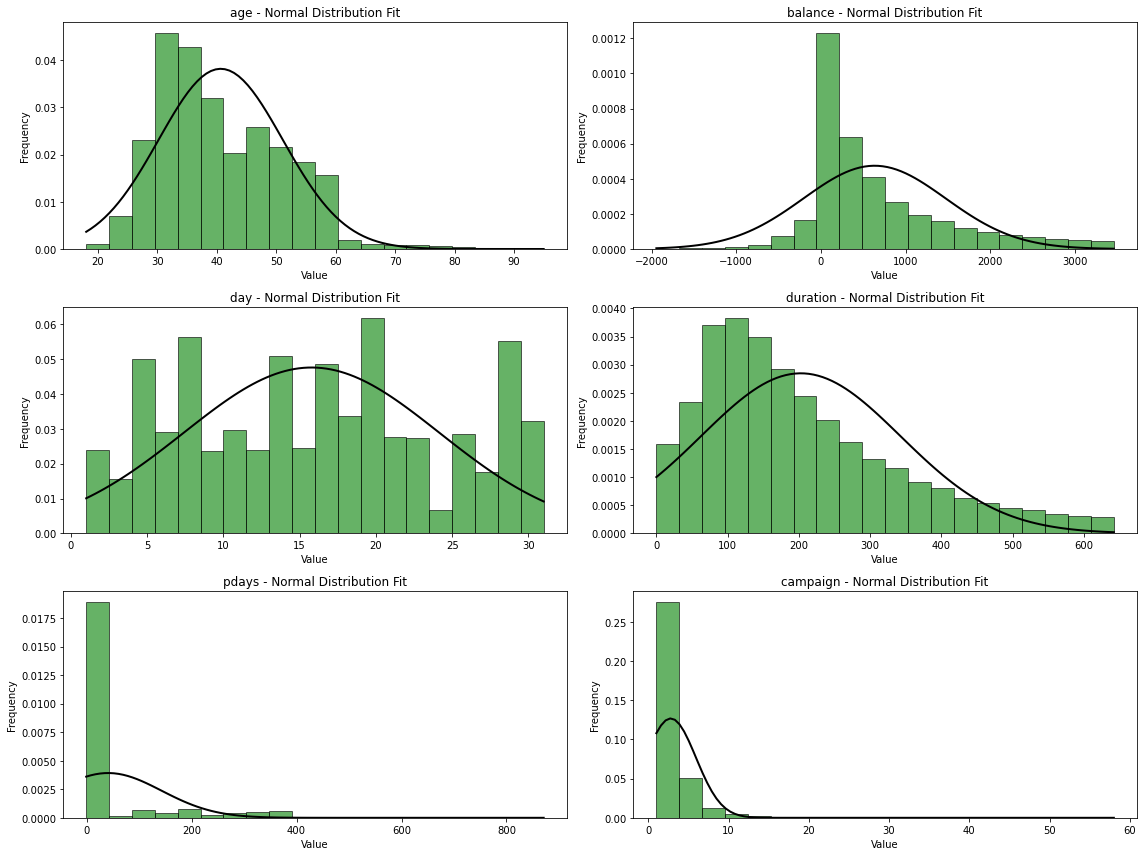

In [24]:
num_cols = ['age','balance','day','duration','pdays','campaign']
df_duration_outliers_rem = df_duration_outliers_rem[num_cols]

# Determine the number of rows and columns for subplots
num_variables = len(df_duration_outliers_rem.columns)
num_rows = (num_variables + 1) // 2  # Add 1 and then floor divide by 2 to ensure enough rows for all variables
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Loop through each column in your DataFrame
for i, column in enumerate(df_duration_outliers_rem.columns):
    # Fit a normal distribution to the data
    mu, std = norm.fit(df_duration_outliers_rem[column])
    
    # Create an array of values from min to max of the data
    xmin, xmax = min(df_duration_outliers_rem[column]), max(df_duration_outliers_rem[column])
    x = np.linspace(xmin, xmax, 100)
    
    # Calculate the probability density function (PDF) for the normal distribution
    pdf = norm.pdf(x, mu, std)
    
    # Plot the histogram of the data
    axes[i].hist(df_duration_outliers_rem[column], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
    
    # Plot the bell curve (PDF)
    axes[i].plot(x, pdf, 'k', linewidth=2)
    
    # Add labels and title
    axes[i].set_title(f'{column} - Normal Distribution Fit')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots
for j in range(num_variables, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

We can consider removing the outliers in duration as well as it doesn't have an impact on the rest of our variable distributions

In [25]:
df_duration_outliers_rem.to_csv('Data/ban-full-outliers-removed.csv',index=False)